**Full Name - Student ID:** 
- Huynh Viet Tien - 23521570 (Leader)
- Nguyen Cong Phat - 23521143  
- Nguyen Minh Bao - 23520123
- Pham Phu Bao - 23520133

**Subject:** Machine Learning with Python

**Class:** CS116.P22

**Topic:** Loan Approval Prediction

**Assignment 3:** Preprocessing Data


# Outline
- [ 1. GIỚI THIỆU BÀI TOÁN ](#1)
- [ 2. DATASET DESCRIPTION ](#2)
- [ 3. BƯỚC 2 - PHÂN TÍCH DỮ LIỆU (EDA) ](#3)
  - [ Import Libraries ](#3.1)
  - [ Đọc dữ liệu ](#3.2)
  - [ Data Visualization: Single Variable Analysis ](#3.3)
      - [ Phân phối của Đặc trưng mục tiêu ](#ex01)
      - [ Phân phối của Đặc trưng số](#ex02)
      - [ Phân phối của Đặc trưng phân loại ](#ex03)
  - [ Data Visualization: Bivariate Analysis ](#3.4)
  - [ Data Visualization: Multivariate Analysis ](#3.5)
- [ 4. BƯỚC 3 - TIỀN XỬ LÝ DỮ LIỆU ](#4)
  - [ Re-load Dataset ](#4.1)
  - [ 4.1 Các chiến thuật xử lý NULL ](#4.2)
  - [ 4.2 Các chiến thuật xử lý outlier ](#4.3)
    - [ Vẽ các biểu đồ giúp trực quan hóa sự phân tán của dữ liệu và xác định các giá trị ngoại lai (outliers) một cách rõ ràng hơn. ](#ex01)
    - [ Xử lý outliers ở cột person_emp_length ](#ex01)
    - [ Xử lý các outliers ở cột person_age ](#ex02)
    - [ Xử lý ở hai cột person_income và loan_amnt ](#ex03)
    - [ Xử lý ở cột loan_int_rate  ](#ex04)
    - [ Xử lý trên cột cb_person_cred_hist_length ](#ex05)
  - [ 4.3 Mã hoá dữ liệu - Encoding ](#4.4)
  - [ 4.4 Chuẩn hoá dữ liệu - Data Scaling ](#4.5)
    - [ Xem lại dữ liệu trước khi chọn phương pháp chuẩn hoá ](#ex01)
    - [ Tại sao biểu đồ phân phối lại quan trọng trong việc chọn scaler? ](#ex02)
    - [ Lựa chọn phương pháp: MinMaxScaler ](#ex03)

# 1. GIỚI THIỆU BÀI TOÁN 

- Ngày nay, việc vay vốn từ ngân hàng đã trở thành một điều hết sức phổ biến. Các ngân hàng kiếm lợi nhuận từ lãi suất của các khoản vay mà họ cấp cho khách hàng. Khi xem xét phê duyệt một khoản vay, ngân hàng cần cân nhắc đến nhiều yếu tố quan trọng như lịch sử tính dụng, tuổi của người vay, tổng thu nhập hàng năm, tình trạng sở hữu nhà ở (ví dụ: sở hữu, thuê, thế chấp,...) và số năm kinh nghiệm làm việc hiện tại của họ.
- Có rất nhiều người nộp đơn xin vay vốn với đa dạng các mục đích như chi trả cho giáo dục, chi phí y tế, đầu tư mạo hiểm, chi tiêu cá nhân và nhiều mục đích khác nữa. Tuy nhiên, không phải tất cả các đơn xin vay đều được phê duyệt dựa trên những điều kiện đã được đề cập ở trên. Thực tế cho thấy, có vô số trường hợp đơn xin vay của người nộp đơn không được các công ty tài chính chấp thuận. Chính vì vậy, việc dự đoán một cách chính xác liệu có nên cấp khoản vay cho một khách hàng hay không đóng vai trò vô cùng quan trọng đối với các ngân hàng để tối đa hóa lợi nhuận và giảm thiểu rủi ro.
- Các hình thức cho vay hiện nay rất đa dạng. Thông thường, các khoản vay này được cung cấp bởi các ngân hàng và nhiều tổ chức tài chính khác. Các điều khoản cụ thể của mỗi khoản vay, ví dụ như mức lãi suất và các loại phí liên quan, sẽ có sự khác biệt tùy thuộc vào chính sách của từng bên cho vay và đặc điểm của từng loại hình khoản vay.
- **Mục tiêu cốt lõi của dự án này** là xây dựng một mô hình dự đoán có khả năng phân loại chính xác các đơn xin vay thành hai nhóm: được phê duyệt hoặc bị từ chối. Mô hình này sẽ là một công cụ đắc lực giúp các tổ chức cho vay đưa ra những quyết định sáng suốt trong việc xét duyệt hồ sơ vay vốn, dựa trên đánh giá chính xác về khả năng trả nợ của người nộp đơn. Việc ứng dụng mô hình này không chỉ mở ra cơ hội tiếp cận nguồn vốn cho một lượng lớn khách hàng tiềm năng, đặc biệt là những người chưa có lịch sử tín dụng, mà còn góp phần quan trọng vào việc giảm thiểu rủi ro tín dụng cho các nhà cung cấp dịch vụ tài chính.
- Trong báo cáo này, nhóm sẽ trình bày chi tiết theo từng bước mà chúng tôi đã áp dụng để giải quyết bài toán.

# 2. Dataset Description

Bộ dữ liệu này bao gồm một số lượng lớn các bảng (tabular data) và các kiểu dữ liệu đa dạng (int64, float64, object) chứa các thông tin chi tiết về các ứng viên nộp đơn vay vốn:
- Tập huấn luyện: 58,645 mẫu.
- Tập kiểm tra: 39,098 mẫu.
- Số lượng đặc trưng: 13 (bao gồm cả Đặc trưng mục tiêu). Các đặc trưng được chia thành ba loại chính: 
    - 8 Đặc trưng số (Numeric features).
    - 4 Đặc trưng phân loại (Categorical features)
    - 1 Đặc trưng mục tiêu.

💸💸 **Features Information** 💸💸
- id : Mã của người vay (Mã định dinh duy nhất cho mỗi khoảng vay)
- person_age : Tuổi của người nộp đơn vay.
- person_income : Tổng thu nhập hàng năm của người nộp đơn.
- person_home_ownership : Tình trạng sở hữu nhà ở.
    - ví dụ: RENT - thuê, OWN - sở hữu, MORTGAGE - thế chấp,...
- person_emp_length : Số năm kinh nghiệm làm việc.
- loan_intent : Mục đích vay vốn. 
    - Ví dụ: PERSONAL, EDUCATION, MEDICAL,...
- loan_grade : Xếp hạng khoản vay (A-E).
- loan_amnt : Số tiền vay.
- loan_int_rate : Lãi suất khoản vay.
- loan_percent_income : Tỷ lệ phần trăm thu nhập hằng năm dùng để trả nợ.
- cb_person_default_on_file : Lịch sử nợ xấu trong hồ sơ tín dụng - Từng vỡ nợ trong quá khứ hay không? (Y/N).
- cb_person_cred_hist_length : Số năm lịch sử tín dụng.
- loan_status : Trạng thái khoản vay (0 = Từ chối, 1 = Duyệt) - Cột mục tiêu 

# 3. BƯỚC 2 - PHÂN TÍCH DỮ LIỆU (EDA)

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Đọc dữ liệu

In [3]:
df_train = pd.read_csv("../train.csv")
df_train.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [4]:
df_test = pd.read_csv("../test.csv")
df_test.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


In [5]:
df_train.columns.values

array(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_status'], dtype=object)

In [6]:
# Cấu trúc của tập dữ liệu huấn luyện
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

**Nhận xét:** Số lượng giá trị non-null: Tất cả các cột đều có 58645 non-null values, điều này có nghĩa là không có giá trị bị thiếu (missing values) trong tập huấn luyện. Đây là một tin tốt vì không cần lo lắng về việc xử lý missing values ở bước tiền xử lý dữ liệu cho tập huấn luyện này.

In [7]:
# Thống kê mô tả chi tiết
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


**Nhận xét:**
- **Cột id:** 
    - Giá trị trung bình khoảng 29322 và không có ý nghĩa thống kê nhiều. 
    - Phạm vi từ 0 đến 58644, khớp với số lượng hàng.
- **Cột person_age:** 
    - Tuổi trung bình là khoảng 27.55 tuổi. 
    - Độ tuổi dao động từ **20 đến tận 123 tuổi** => Giá trị 123 có thể là outlier.
- **Cột person_income:** 
    - Thu nhập trung bình khá cao, khoảng 64,046.
    - Có sự chênh lệch lớn về thu nhập, từ mức thấp 4,200 đến mức rất cao 1,900,000 => Cần xem xét phân phối kỹ hơn về sự phân tán này.
- **Cột person_emp_length:** 
    - Số năm kinh nghiệm làm việc trung bình là khoảng 4.7 năm.
    - Phạm vi từ **0 đến tận 123 năm**. Tương tự như person_age, giá trị 123 năm kinh nghiệm là một giá trị bất thường rõ ràng => có thể là outlier.
- **Cột loan_amnt:**
    - Số tiền vay trung bình là khoảng 9,217.
    - Số tiền vay dao động từ 500 đến 35,000.
- **Cột loan_int_rate:**
    - Lãi suất trung bình là khoảng 10.68%.
    - Lãi suất dao động từ 5.42% đến 23.22%.
- **Cột loan_percent_income:**
    - Tỷ lệ phần trăm thu nhập hàng năm dùng để trả nợ trung bình là khoảng 0.159 (15.9%).
    - Giá trị nhỏ nhất là 0 *(có thể là không có khoản nợ nào khác?)*, và giá trị lớn nhất là 0.83 (83%) - một tỷ lệ khá cao => có thể là dấu hiệu rủi ro.
- **Cột cb_person_cred_hist_length:**
    - Độ dài lịch sử tín dụng trung bình là khoảng 5.81 năm.
    - Phạm vi từ 2 đến 30 năm.
- **Cột loan_status:**
    - Giá trị trung bình là 0.142. 
    - Tỷ lệ các hồ sơ vay được duyệt và chấp nhận (loan_status = 1) trong tập huấn luyện là khoảng 14.2%.
    - Do đó, tỷ lệ các hồ sơ vay bị từ chối (loan_status = 0) là khoảng 100% - 14.2% = 85.8%.
    - Đây là một dấu hiệu của mất cân bằng dữ liệu.

In [8]:
# Khám phá các giá trị duy nhất trong các cột có kiểu dữ liệu object (categorical features):
print("Unique values in person_home_ownership:", df_train['person_home_ownership'].unique())
print("Unique values in loan_intent:", df_train['loan_intent'].unique())
print("Unique values in loan_grade:", df_train['loan_grade'].unique())
print("Unique values in cb_person_default_on_file:", df_train['cb_person_default_on_file'].unique())

Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
Unique values in loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
Unique values in cb_person_default_on_file: ['N' 'Y']


**Nhận xét:**
- **Cột person_home_ownership:**
    - Các giá trị bao gồm: 'RENT', 'OWN', 'MORTGAGE', 'OTHER'.
    - Chúng ta sẽ cần xử lý cột này bằng một phương pháp encoding phù hợp (ví dụ như one-hot encoding), vì đây là các danh mục rời rạc và không có thứ tự rõ ràng (ngoại trừ có thể có một số suy luận về mức độ ổn định tài chính).
- **Cột loan_intent:**
    - Các giá trị bao gồm: 'EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'.
    - Tương tự như cột trên, đây là các danh mục rời rạc và chúng ta có thể sử dụng one-hot encoding để chuyển đổi chúng thành dạng số mà mô hình có thể hiểu được.
- **Cột loan_grade:**
    - Các giá trị bao gồm: 'B', 'C', 'A', 'D', 'E', 'F', 'G'.
    - Đây là một biến thứ bậc (ordinal variable) vì các hạng mục có một thứ tự tự nhiên (A là tốt nhất, sau đó đến B, C, ..., G là rủi ro nhất). Trong trường hợp này, chúng ta có thể sử dụng label encoding để gán các giá trị số theo thứ tự này (ví dụ: A -> 0, B -> 1, C -> 2, ..., G -> 6) để mô hình có thể hiểu được thứ tự.
- **Cột cb_person_default_on_file:**
    - Các giá trị bao gồm: 'N' (Không có nợ xấu) và 'Y' (Có nợ xấu).
    - Đây là một biến nhị phân (binary categorical variable). Chúng ta có thể dễ dàng chuyển đổi nó thành dạng số bằng cách sử dụng label encoding (ví dụ: 'N' -> 0, 'Y' -> 1) hoặc thậm chí one-hot encoding (tạo hai cột mới: cb_person_default_N và cb_person_default_Y).

## Data Visualization: Single Variable Analysis

### Phân phối của Đặc trưng mục tiêu

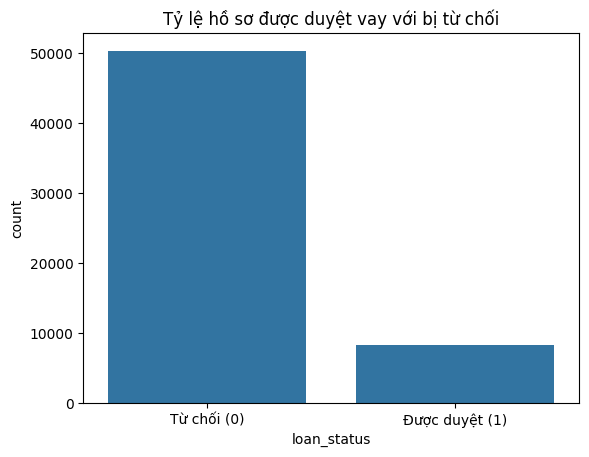

In [9]:
sns.countplot(data=df_train, x='loan_status')
plt.title('Tỷ lệ hồ sơ được duyệt vay với bị từ chối')
plt.xticks([0,1], ['Từ chối (0)', 'Được duyệt (1)'])
plt.show()

**Nhận xét:** Số lượng hồ sơ bị từ chối nhiều hơn gấp khoảng 7 lần số lượng hồ sơ được duyệt => Mất cân bằng dữ liệu.
- **Ảnh hưởng đến mô hình:** Với sự mất cân bằng lớn như vậy, một mô hình học máy tiêu chuẩn có thể sẽ có xu hướng nghiêng về việc dự đoán "từ chối" ("biased" - thiên vị) cho hầu hết các trường hợp để đạt được độ chính xác cao tổng thể, nhưng lại hoạt động kém trong việc nhận diện các trường hợp được duyệt.
- **Cần các biện pháp xử lý:** Chúng ta chắc chắn cần phải cân nhắc các kỹ thuật xử lý dữ liệu mất cân bằng (oversampling - tăng số lượng mẫu "Được duyệt (1)" , undersampling - giảm số lượng mẫu "Từ chối (0)", sử dụng các thuật toán nhạy cảm với imbalance data, hoặc các phương pháp gán trọng số cho các lớp) trong quá trình xây dựng mô hình để đảm bảo mô hình có thể học được cả hai lớp một cách hiệu quả.
- **Đánh giá mô hình:** Chúng ta cũng cần sử dụng các chỉ số đánh giá hiệu suất phù hợp hơn cho dữ liệu mất cân bằng, chẳng hạn như Precision, Recall, F1-score, và AUC-ROC, thay vì chỉ dựa vào Accuracy.

### Phân phối của các Đặc trưng số

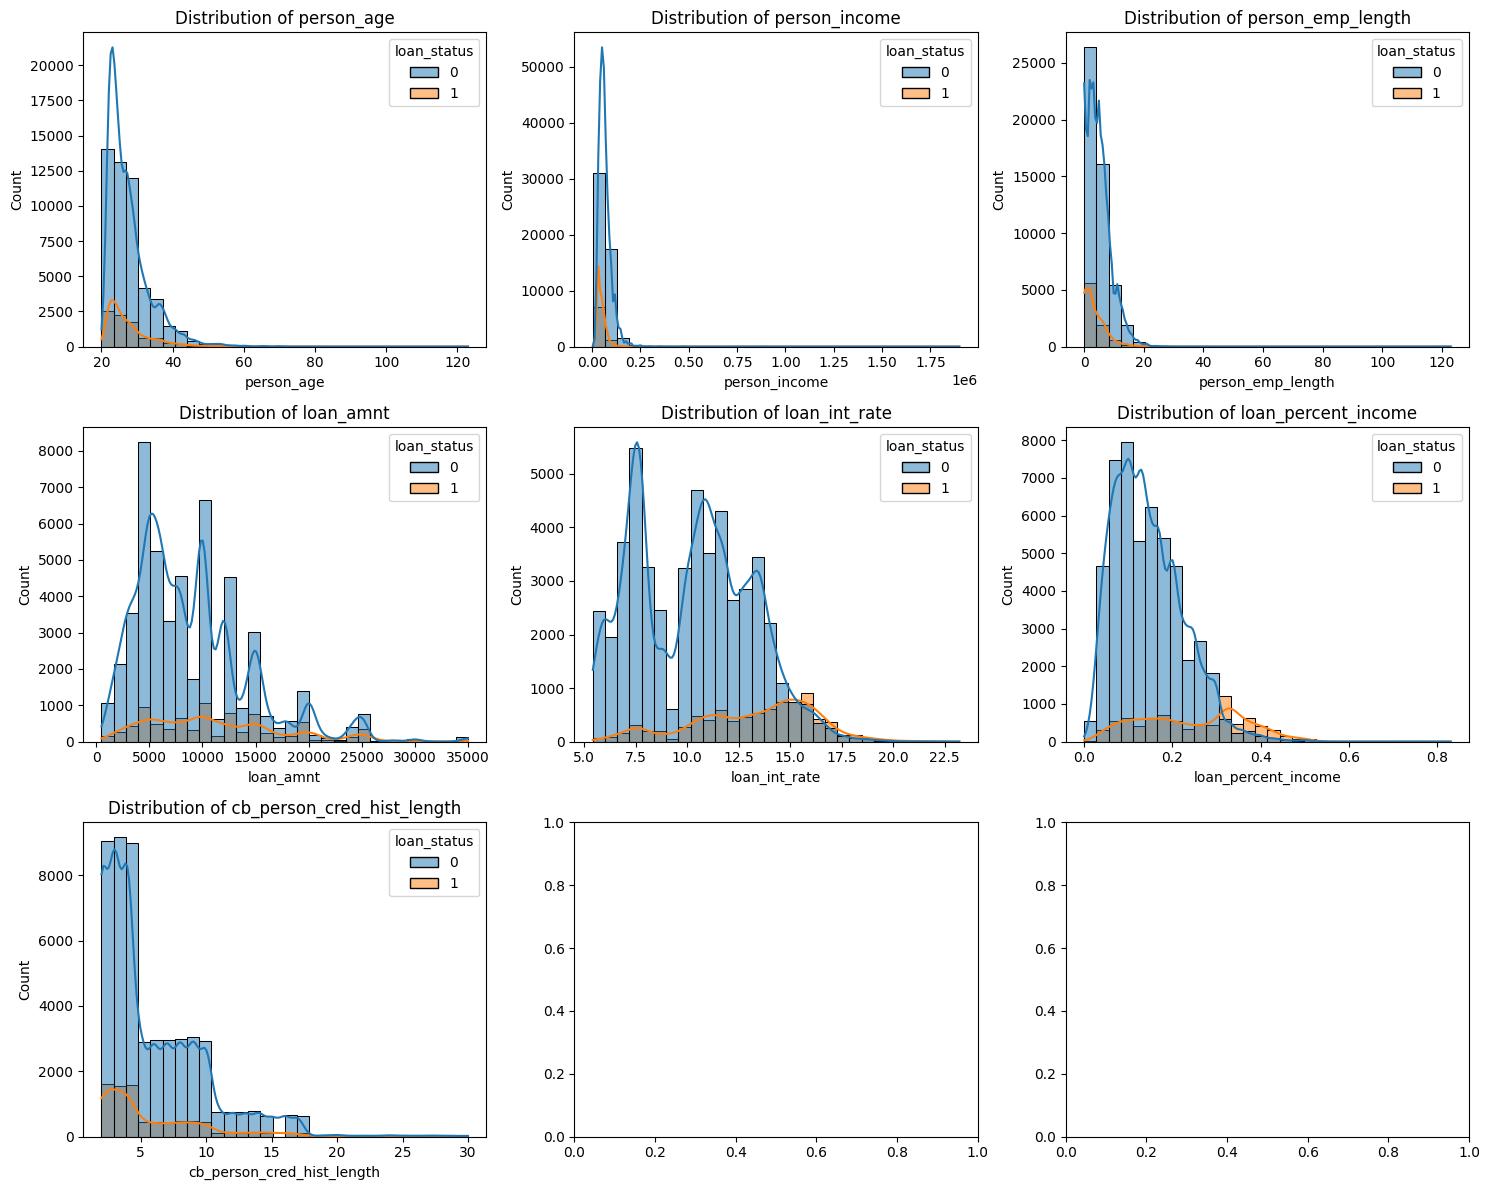

In [10]:
# biểu đồ phân phối (histplot) của các biến số (numerical features) theo loan_status
numerical_features = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]
fig, axes = plt.subplots(nrows=len(numerical_features)//2, ncols=len(numerical_features)//2, figsize=(15, 12))
axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_train, x=feature, hue="loan_status", bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Cột person_age:**
    - Phân phối cho thấy phần lớn người nộp đơn vay nằm trong độ tuổi trẻ (20-30).
    - Có vẻ như tỷ lệ hồ sơ "được duyệt" vay (loan_status=1) cao hơn một chút ở nhóm tuổi trẻ hơn và có xu hướng giảm dần khi tuổi tăng lên. Tuy nhiên, chúng ta cũng thấy một vài trường hợp hồ sợ "được duyệt" vay ở độ tuổi rất cao, có thể liên quan đến các giá trị outlier đã được đề cập trước đó (tuổi 123).
- **Cột person_income:**
    - Phân phối thu nhập có xu hướng lệch phải, với phần lớn người vay có thu nhập thấp hơn.
    - Có vẻ như tỷ lệ hồ sơ "được duyệt" vay (loan_status=1) cao hơn ở những người có thu nhập thấp hơn. Khi thu nhập tăng lên, tỷ lệ hồ sơ "được duyệt" vay có xu hướng giảm. Tuy nhiên, vẫn có một số trường hợp hồ sơ được duyệt vay ở những người có thu nhập rất cao.
- **Cột person_emp_length:**
    - Phần lớn người vay có thời gian làm việc ngắn (dưới 10 năm).
    - Có vẻ như tỷ lệ hồ sơ "được duyệt" vay (loan_status=1) cao hơn ở những người có thời gian làm việc ngắn hơn hoặc bằng 0. Khi thời gian làm việc tăng lên, tỷ lệ hồ sơ "được duyệt" vay có xu hướng giảm. Tương tự như tuổi, ta cũng có thể thấy một vài trường hợp hồ sơ "được duyệt" vay ở những người có thời gian làm việc rất dài (123 năm - outlier).
- **Cột loan_amnt:**
    - Phân phối số tiền vay tập trung ở các khoản vay nhỏ hơn (dưới 10,000).
    - Có vẻ như tỷ lệ "được duyệt" vay (loan_status=1) có xu hướng tăng lên khi số tiền vay lớn hơn.
- **Cột loan_int_rate:**
    - Phân phối lãi suất có vẻ tập trung ở một số khoảng nhất định.
    - Rõ ràng có sự khác biệt lớn về phân phối lãi suất giữa các khoản vay "không được duyệt" (loan_status=0) và "được duyệt" (loan_status=1). Các khoản vay "được duyệt" có xu hướng có lãi suất cao hơn đáng kể. **Đây có vẻ là một yếu tố dự đoán mạnh mẽ.**
- **Cột loan_percent_income:**
    - Phân phối tỷ lệ này tập trung ở mức thấp (dưới 0.2).
    - Rất rõ ràng là tỷ lệ "được duyệt" (loan_status=1) tăng lên đáng kể khi tỷ lệ phần trăm thu nhập dùng để trả nợ cao hơn. **Đây cũng là một yếu tố dự đoán quan trọng.**
- **Cột cb_person_cred_hist_length:**
        - Phần lớn người vay có lịch sử tín dụng ngắn (dưới 10 năm).
        - Có vẻ như tỷ lệ "được duyệt" (loan_status=1) cao hơn ở những người có lịch sử tín dụng ngắn hơn. Khi lịch sử tín dụng dài hơn, tỷ lệ "được duyệt" có xu hướng giảm.

=> Vấn đề về outliers ở person_age và person_emp_length cần được xử lý. 

### Phân phối của các Đặc trưng phân loại

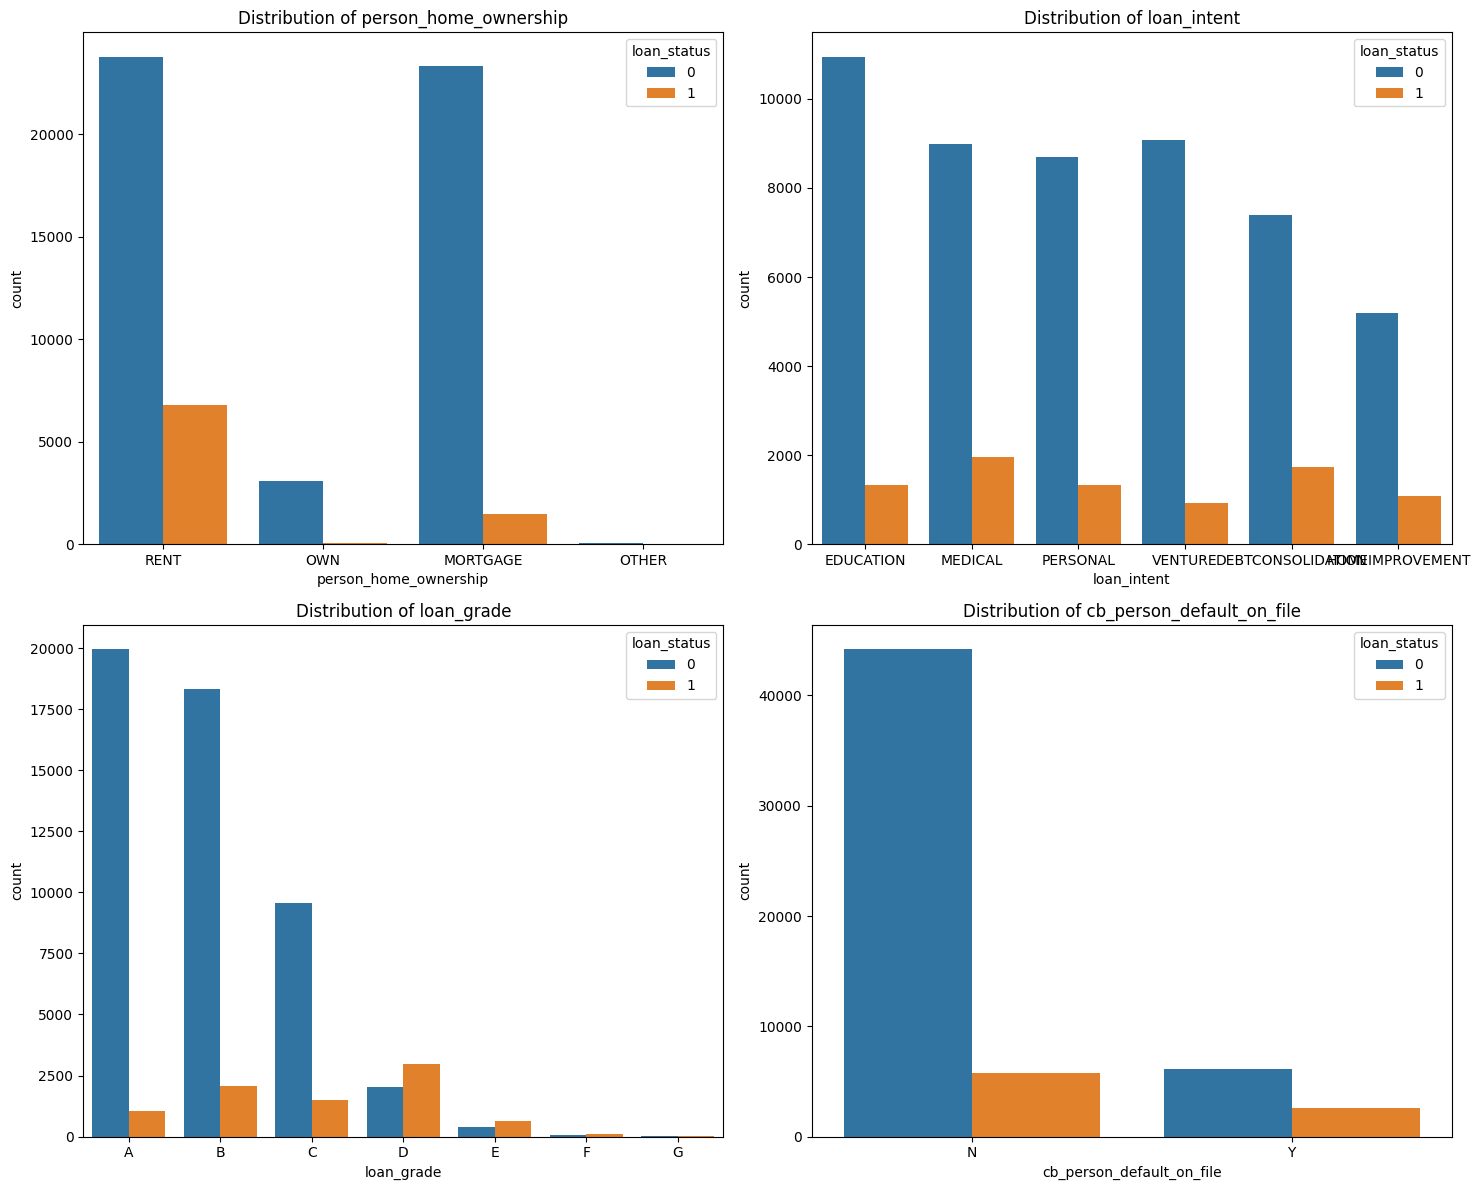

In [11]:
# Các biểu đồ countplot cho các Categorical Features theo loan_status
categorical_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
fig, axes = plt.subplots(nrows=len(categorical_features)//2, ncols=len(categorical_features)//2, figsize=(15, 12))
axes = axes.flatten()


for i, feature in enumerate(categorical_features):
    if feature == "loan_grade":
        sns.countplot(data=df_train, x=feature, hue="loan_status",ax=axes[i], order=["A", "B", "C", "D", "E", "F", "G"])
    else:
         sns.countplot(data=df_train, x=feature, hue="loan_status",ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Cột person_home_ownership:**
    - Phần lớn người vay thuộc nhóm 'RENT' và 'MORTGAGE'
    - Tỷ lệ loan_status=1 có vẻ cao hơn ở nhóm 'RENT' so với các nhóm khác. Nhóm 'OWN' có tỷ lệ hồ sơ "được duyệt" thấp nhất. Nhóm OTHER có số lượng mẫu rất ít nên khó đưa ra kết luận chắc chắn.
    - Biến này có thể chứa thông tin quan trọng về sự ổn định tài chính của người vay.
- **Cột loan_intent:**
    - Các mục đích vay phổ biến nhất là DEBTCONSOLIDATION, PERSONAL, MEDICAL, và EDUCATION. VENTURE và HOMEIMPROVEMENT có số lượng mẫu ít hơn
    - Tỷ lệ "được duyệt" (loan_status=1) có sự khác biệt giữa các mục đích vay. Ví dụ, VENTURE và DEBTCONSOLIDATION có vẻ có tỷ lệ "được duyệt" cao hơn so với EDUCATION.
- **Cột loan_grade:**
    - Số lượng khoản vay tập trung chủ yếu ở các hạng mục A, B, và C. Số lượng giảm dần từ D đến G.
    - Rõ ràng có một mối quan hệ rất mạnh mẽ giữa loan_grade và loan_status. Tỷ lệ "được duyệt" tăng lên đáng kể khi chất lượng khoản vay giảm từ A đến G. A có tỷ lệ "được duyệt" rất thấp, trong khi G có tỷ lệ "được duyệt" rất cao. Đây chắc chắn là một yếu tố dự đoán rất quan trọng. Chúng ta đã sắp xếp thứ tự các hạng mục trong biểu đồ, giúp thấy rõ xu hướng này.
- **Cột cb_person_default_on_file:**
    - Phần lớn người vay không có lịch sử nợ xấu (N).
    - Những người có lịch sử nợ xấu (Y) có tỷ lệ "được duyệt" cao hơn đáng kể so với những người không có. Đây cũng là một yếu tố dự đoán quan trọng.

## Data Visualization: Bivariate Analysis

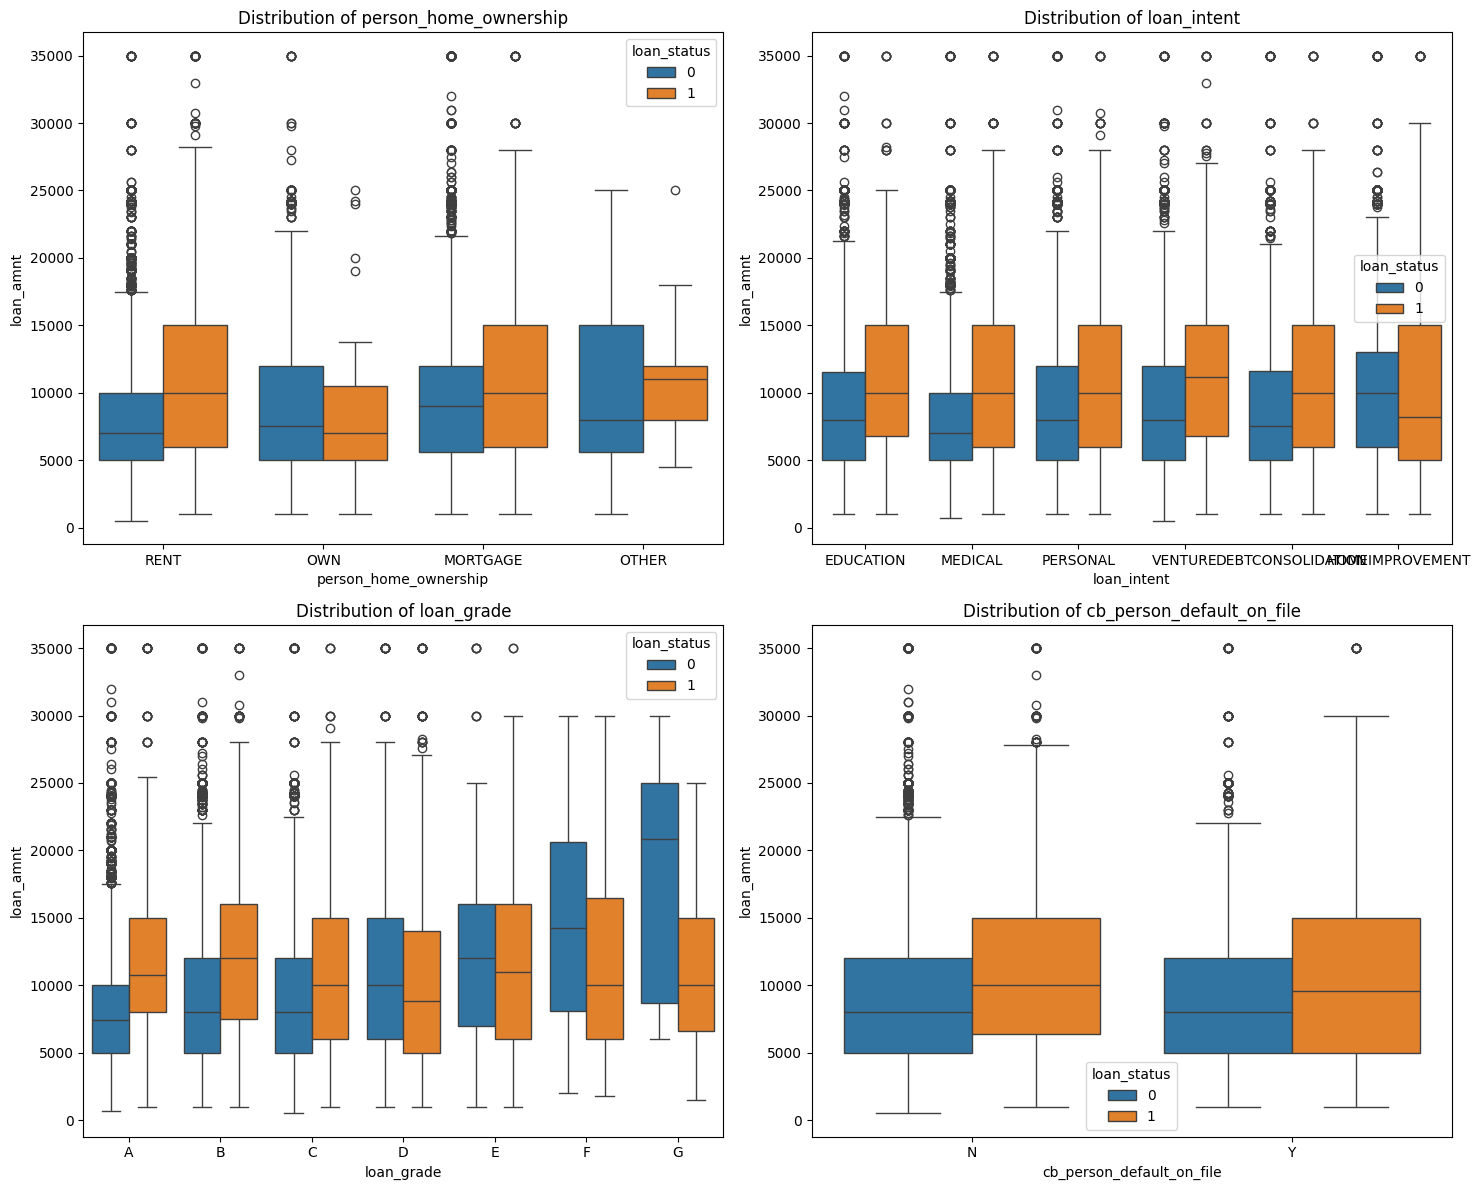

In [12]:
# Các biểu đồ boxplot thể hiện mối quan hệ giữa các biến categorical và số tiền vay (loan_amnt), được phân tách theo trạng thái khoản vay (loan_status).
fig, axes = plt.subplots(nrows=len(categorical_features)//2, ncols=len(categorical_features)//2, figsize=(15, 12))
axes = axes.flatten()
order_ = df_train.index

for i, feature in enumerate(categorical_features):
    if feature == "loan_grade":
        sns.boxplot(data=df_train, y="loan_amnt" ,x=feature, hue="loan_status",ax=axes[i], order=["A", "B", "C", "D", "E", "F", "G"])
    else:
        sns.boxplot(data=df_train, y="loan_amnt" ,x=feature, hue="loan_status",ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

**Nhận xét:**
- **person_home_ownership vs loan_amnt:**
    - Có vẻ như những người sở hữu nhà (OWN hoặc MORTGAGE) có xu hướng vay số tiền lớn hơn so với những người thuê nhà (RENT).
    - Trong mỗi nhóm tình trạng sở hữu nhà, không có sự khác biệt quá rõ rệt về phân phối loan_amnt giữa những người "được duyệt" (1) và "không được duyệt" (0), ngoại trừ có thể ở nhóm RENT, số tiền vay của những người vỡ nợ có xu hướng cao hơn một chút.
- **loan_intent vs loan_amnt:**
    - Số tiền vay có sự khác biệt đáng kể giữa các mục đích vay. 
        Ví dụ, DEBTCONSOLIDATION và HOMEIMPROVEMENT thường có số tiền vay lớn hơn so với EDUCATION hoặc MEDICAL.
    - Trong hầu hết các mục đích vay, không có sự khác biệt lớn về phân phối loan_amnt giữa người "được duyệt" và "không được duyệt". Tuy nhiên, ở mục đích VENTURE, có vẻ như những người "được duyệt" có xu hướng vay số tiền lớn hơn.
- **loan_grade vs loan_amnt:**
    - Rõ ràng có một xu hướng là số tiền vay trung bình tăng lên khi chất lượng khoản vay giảm từ A đến G. Các khoản vay hạng G thường có số tiền vay lớn hơn so với hạng A.
    - Trong mỗi hạng mục loan_grade, không có sự khác biệt quá lớn về phân phối loan_amnt giữa người "được duyệt" và "không được duyệt", mặc dù có một vài điểm khác biệt nhỏ ở các hạng mục cụ thể.
- **cb_person_default_on_file vs loan_amnt:**
    - Những người đã từng có lịch sử nợ xấu (Y) có xu hướng vay số tiền lớn hơn một chút so với những người chưa từng có (N).
    - Phân phối loan_amnt của những người đã từng có nợ xấu có vẻ rộng hơn, cho thấy sự biến động lớn hơn về số tiền vay

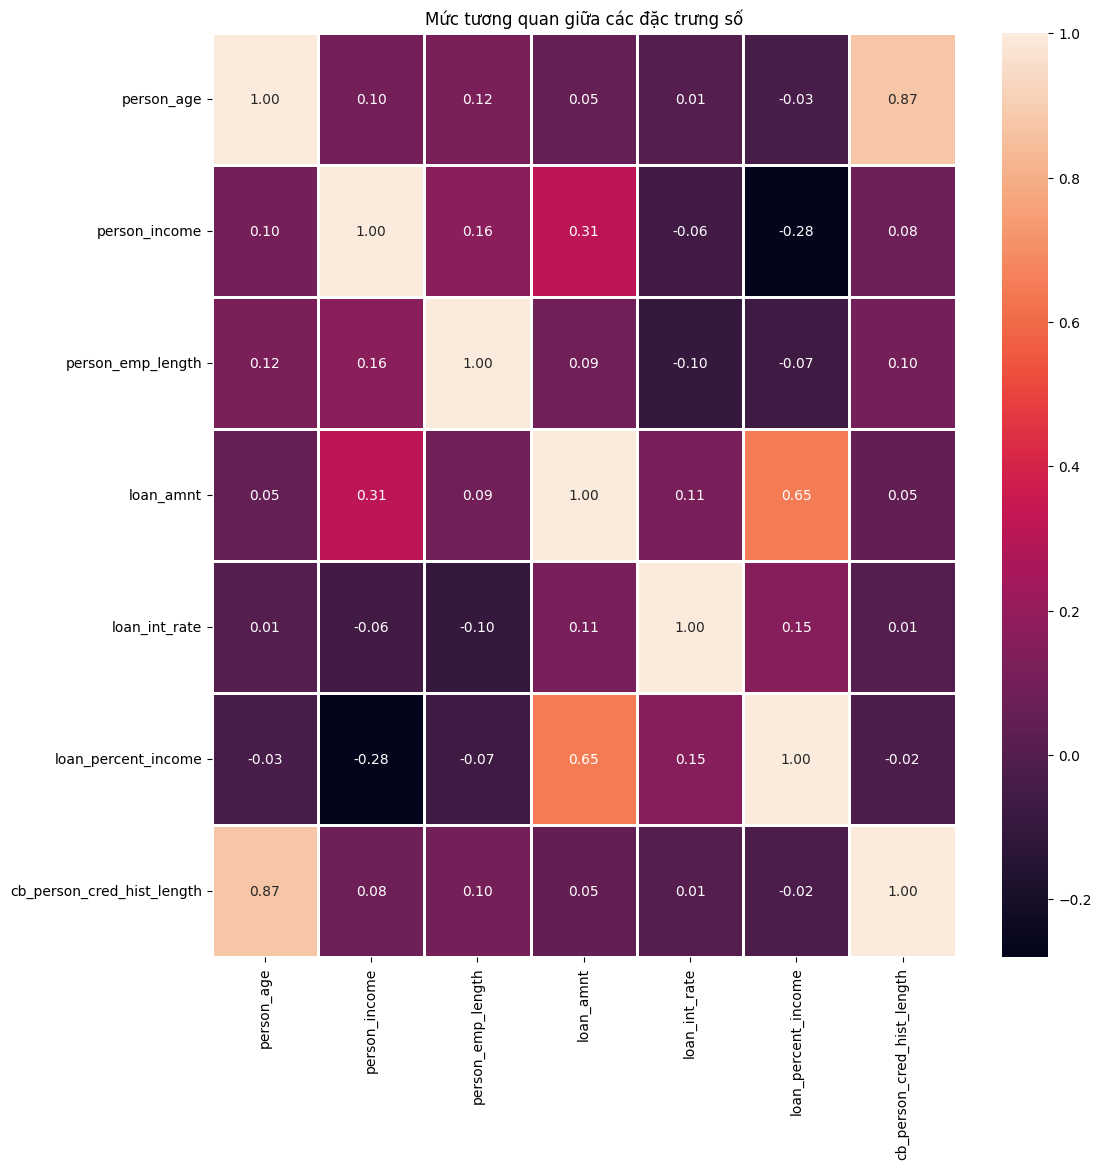

In [13]:
# Ma trận tương quan giữa các đặc trưng số
plt.figure(figsize=(12,12))
corr_matrix = df_train[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f',linecolor='white', linewidths=1)
plt.title('Mức tương quan giữa các đặc trưng số')
plt.show()

**Nhận xét:**
- **person_age và cb_person_cred_hist_length:** Có một mối tương quan dương khá mạnh (0.87) giữa độ tuổi của người vay và độ dài lịch sử tín dụng của họ. Điều này hoàn toàn hợp lý vì người lớn tuổi thường có lịch sử tín dụng dài hơn.
- **loan_amnt và person_income:** Có một mối tương quan dương trung bình (0.31) giữa số tiền vay và thu nhập. Điều này cũng dễ hiểu vì ngân hàng thường có xu hướng cho những người có thu nhập cao hơn vay số tiền lớn hơn.
- **loan_amnt và và loan_percent_income:** Có một mối tương quan dương mạnh (0.65) giữa số tiền vay và tỷ lệ phần trăm thu nhập dùng để trả nợ. Điều này có nghĩa là khi số tiền vay tăng lên, tỷ lệ thu nhập phải trả nợ cũng có xu hướng tăng.
- **loan_int_rate và loan_grade:** Mặc dù loan_grade không phải là một biến số, nhưng chúng ta biết nó có thứ tự (A tốt nhất đến G tệ nhất) và thường có mối tương quan với lãi suất. Lãi suất càng cao thường đi kèm với rủi ro vỡ nợ cao hơn, tương ứng với các grade thấp hơn (D, E, F, G). Heatmap này không trực tiếp thể hiện mối quan hệ đó vì loan_grade là categorical, nhưng loan_int_rate có thể có tương quan với các biến khác.
- **Các mối tương quan yếu:** Hầu hết các cặp biến số còn lại có mối tương quan khá yếu (gần 0). Ví dụ, mối tương quan giữa tuổi và thu nhập (0.10) là yếu, và mối tương quan giữa thời gian làm việc và các biến khác cũng không mạnh.

**Tổng quan và các bước tiếp theo:**
- Ma trận tương quan giúp chúng ta xác định các mối quan hệ tuyến tính giữa các biến số.
- Mối tương quan mạnh giữa tuổi và lịch sử tín dụng là một điều tự nhiên.
- Mối tương quan giữa số tiền vay và thu nhập, cũng như giữa số tiền vay và tỷ lệ nợ trên thu nhập, là những thông tin hữu ích cho mô hình.
- Việc không có tương quan quá mạnh giữa hầu hết các biến số còn lại có thể là một dấu hiệu tốt, vì nó cho thấy các biến này có thể cung cấp thông tin độc lập cho mô hình.

## Data Visualization: Multivariate Analysis

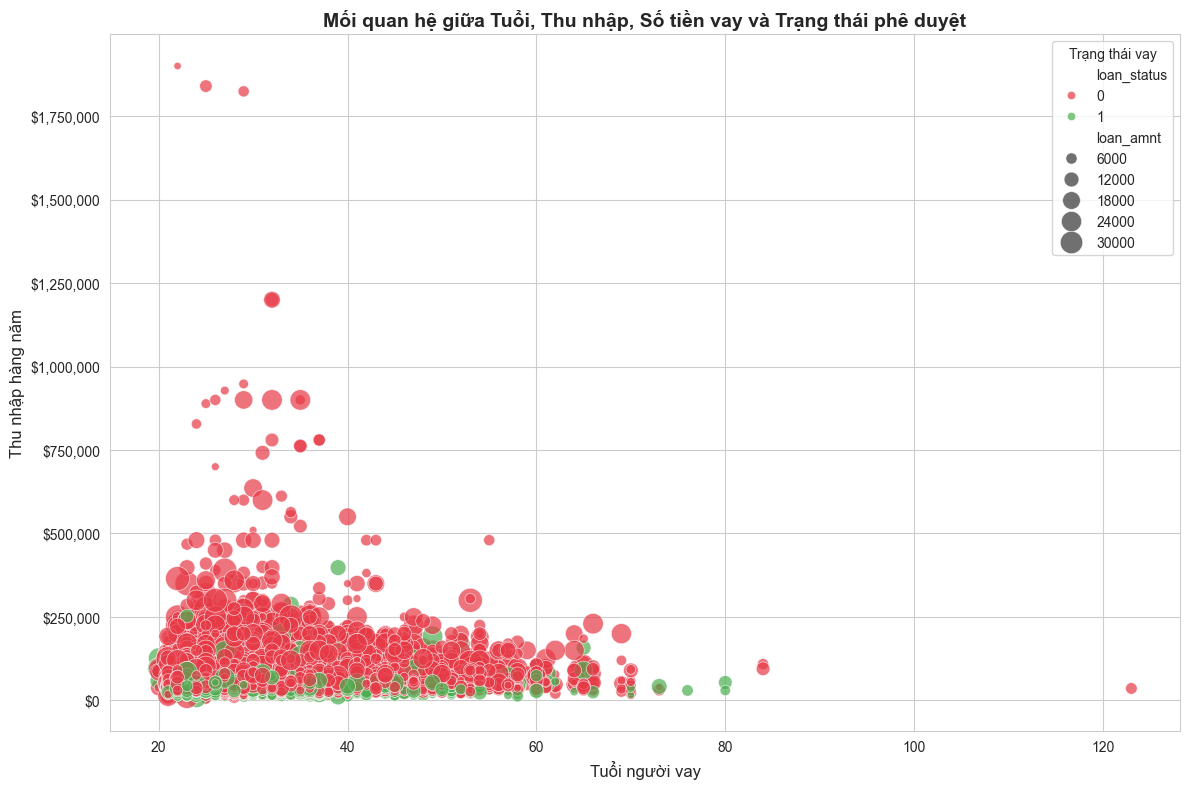

In [14]:
# Tạo biểu đồ mối quan hệ đa chiều giữa độ tuổi, thu nhập, số tiền vay và tỷ lệ chấp thuận
plt.figure(figsize=(12, 8))
    
# Cài đặt style
sns.set_style("whitegrid")

# Tạo scatter plot nâng cao
scatter = sns.scatterplot(
    data=df_train,
    x='person_age',
    y='person_income',
    hue='loan_status',
    size='loan_amnt',
    sizes=(20, 300),
    alpha=0.7,
    palette=['#E63946', '#4CAF50']  # Đỏ cho từ chối, xanh lá cho duyệt
)

# Thêm tiêu đề và nhãn
plt.title('Mối quan hệ giữa Tuổi, Thu nhập, Số tiền vay và Trạng thái phê duyệt', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tuổi người vay', fontsize=12)
plt.ylabel('Thu nhập hàng năm', fontsize=12)

# Định dạng legend
handles, labels = scatter.get_legend_handles_labels()
status_labels = ['Từ chối', 'Được duyệt'] 
plt.legend(title='Trạng thái vay')

# Thêm format tiền cho trục y
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Kích thước điểm ảnh hưởng bởi số tiền vay (size):**
    - Kích thước của mỗi điểm tương ứng với số tiền vay (loan_amnt). Các điểm lớn hơn biểu thị số tiền vay lớn hơn, và các điểm nhỏ hơn biểu thị số tiền vay nhỏ hơn.
    - Chúng ta có thể thấy rằng cả hồ sơ "được duyệt" và bị từ chối đều có thể có số tiền vay lớn hoặc nhỏ, nhưng có vẻ như các khoản vay lớn hơn có xu hướng tập trung ở vùng thu nhập cao hơn.
- **Mối quan hệ giữa tuổi và thu nhập:** Biểu đồ cho thấy không có mối quan hệ tuyến tính mạnh mẽ giữa tuổi và thu nhập trên toàn bộ tập dữ liệu. Tuy nhiên, chúng ta có thể thấy một sự tập trung của phần lớn người vay ở độ tuổi trẻ (20-40) với nhiều mức thu nhập khác nhau.
- **Mối quan hệ giữa thu nhập và trạng thái phê duyệt:** Một trong những quan sát rõ ràng nhất là xu hướng các hồ sơ có thu nhập cao hơn có khả năng được duyệt cao hơn. Vùng phía trên của biểu đồ có mật độ các điểm màu xanh lá cây (được duyệt) cao hơn.
- **Mối quan hệ giữa số tiền vay và trạng thái phê duyệt theo thu nhập:** Ở mức thu nhập cao, có vẻ như cả các khoản vay lớn và nhỏ đều có khả năng được duyệt. Tuy nhiên, ở mức thu nhập thấp, các khoản vay lớn có xu hướng bị từ chối nhiều hơn.




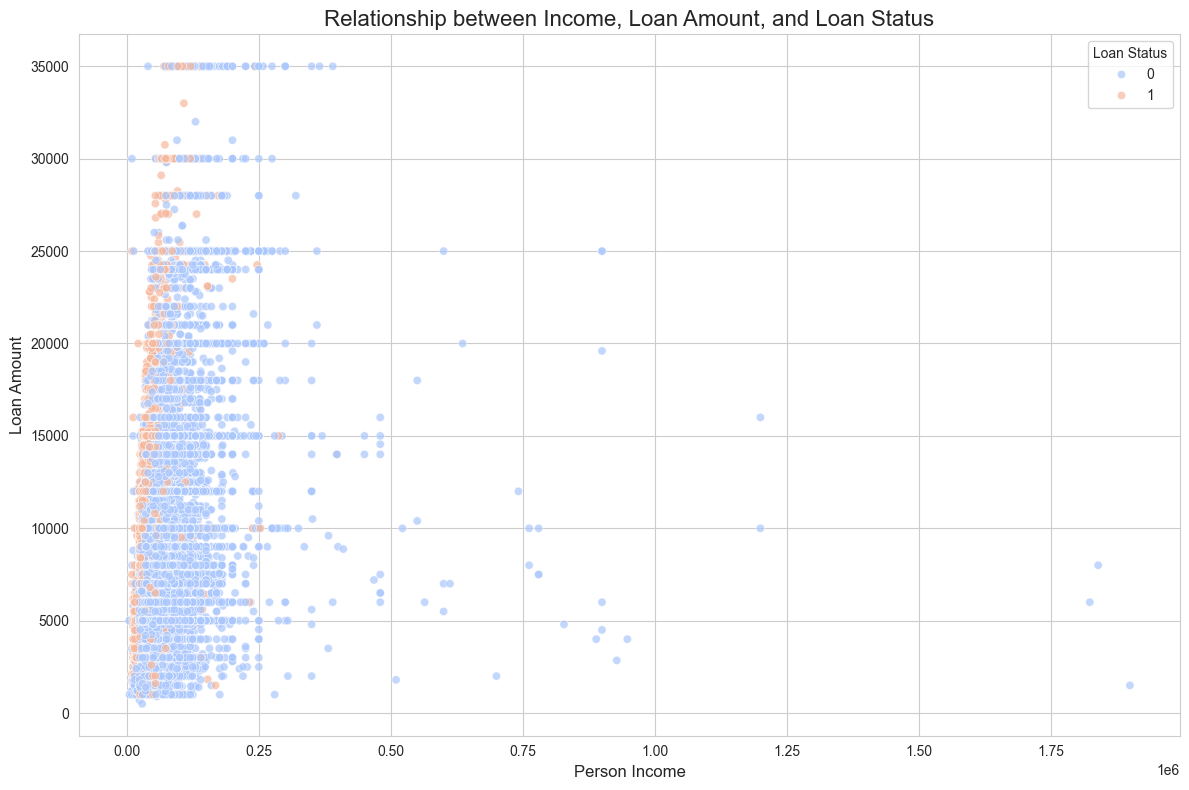

In [15]:
plt.figure(figsize=(12, 8))

# Create a scatter plot to visualize the relationship between person_income, loan_amnt, and loan_status
sns.scatterplot(
    data=df_train,
    x='person_income',
    y='loan_amnt',
    hue='loan_status',
    palette='coolwarm',
    alpha=0.7
)

# Add titles and labels
plt.title('Relationship between Income, Loan Amount, and Loan Status', fontsize=16)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Display the legend
plt.legend(title='Loan Status', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

**Nhận xét:**
- **Phân tách theo trạng thái phê duyệt:**
    - Các điểm màu nhạt (xanh lam nhạt) đại diện cho các hồ sơ bị từ chối (loan_status=0).
    - Các điểm màu cam nhạt đại diện cho các hồ sơ được duyệt (loan_status=1).
- **Mối quan hệ giữa thu nhập và số tiền vay:**
    - Có vẻ như có một sự tập trung lớn của các khoản vay (cả duyệt và từ chối) ở mức thu nhập thấp hơn.
    - Khi thu nhập tăng lên, chúng ta thấy các khoản vay với số tiền lớn hơn xuất hiện nhiều hơn. Điều này khá logic vì ngân hàng có xu hướng cho những người có thu nhập cao hơn vay số tiền lớn hơn.
- **Mối quan hệ giữa thu nhập và trạng thái phê duyệt:**
    - Mặc dù có sự lẫn lộn giữa hai màu ở các mức thu nhập khác nhau, nhưng có một xu hướng rõ ràng là ở mức thu nhập rất thấp, phần lớn các hồ sơ bị từ chối.
    - Khi thu nhập tăng lên, tỷ lệ các hồ sơ được duyệt có vẻ tăng lên. Tuy nhiên, ngay cả ở mức thu nhập cao, vẫn có những trường hợp bị từ chối, cho thấy các yếu tố khác (ngoài thu nhập và số tiền vay) cũng đóng vai trò quan trọng.
- **Mối quan hệ giữa số tiền vay và trạng thái phê duyệt theo thu nhập:**
    - Ở mức thu nhập thấp, cả các khoản vay nhỏ và lớn đều có xu hướng bị từ chối.
    - Ở mức thu nhập cao hơn, có vẻ như các khoản vay nhỏ có xu hướng được duyệt nhiều hơn, nhưng các khoản vay lớn hơn cũng có một tỷ lệ duyệt nhất định.


### Kết luận cho giai đoạn EDA

Nhìn chung, quá trình EDA đã giúp chúng ta hiểu rõ hơn về đặc điểm của dữ liệu, mối quan hệ giữa các biến số và biến mục tiêu, cũng như các vấn đề tiềm ẩn như outliers và mất cân bằng dữ liệu. Những hiểu biết này sẽ là nền tảng quan trọng để chúng ta đưa ra các quyết định hợp lý trong giai đoạn tiền xử lý dữ liệu và xây dựng mô hình.

# 4. BƯỚC 4 - Tiền xử lý dữ liệu

## Re-load dataset

In [16]:
# import packages for preprocessing data
# import gdown
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

- Nhúng thư viện gdown để tải dữ liệu data.zip từ google drive về và lưu unzip vào folder data.
- Tạo hai DataFrame (df_train, df_test) từ dữ liệu. DataFrame này sẽ chứa các đặc trưng (feature) của mẫu và cột loan_status để biểu thị nhãn (target) của mẫu, nghĩa là mẫu đó là được chấp thuận vay (loan_status=1) hay là từ chối cho vay (loan_status=0).

In [17]:
df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../test.csv')

In [18]:
print(df_train.shape)
df_train.head(10)

(58645, 13)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [19]:
print(df_test.shape)
df_test.head(10)

(39098, 12)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


## 4.1 Các chiến thuật xử lý NULL

**Nhận xét từ EDA:** Chúng tôi đã xác định rằng tập dữ liệu huấn luyện (df_train) không có giá trị NULL. Vì vậy, ở bước này, chúng tôi không cần áp dụng bất kỳ chiến thuật xử lý NULL nào cho tập huấn luyện.

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [21]:
df_train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Để chắc chắn, ta cần kiểm tra xem Tập kể tra (test dataset) có giá trị NULL hay không để có thể áp dụng các chiến lược nhất quán (nếu có) với train dataset

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  int64  
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.6+ MB


In [23]:
df_test.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**Nhận xét:** Ta nhận thấy rằng DataFrame này (cả train dataset và test dataset) không bị khuyết dữ liệu.

## 4.2 Các chiến thuật xử lý outlier

**Nhận xét từ EDA:** Chúng tôi đã phát hiện các giá trị bất thường đáng chú ý ở cột person_age (max = 123) và person_emp_length (max = 123).

### Vẽ các biểu đồ giúp trực quan hóa sự phân tán của dữ liệu và xác định các giá trị ngoại lai (outliers) một cách rõ ràng hơn.

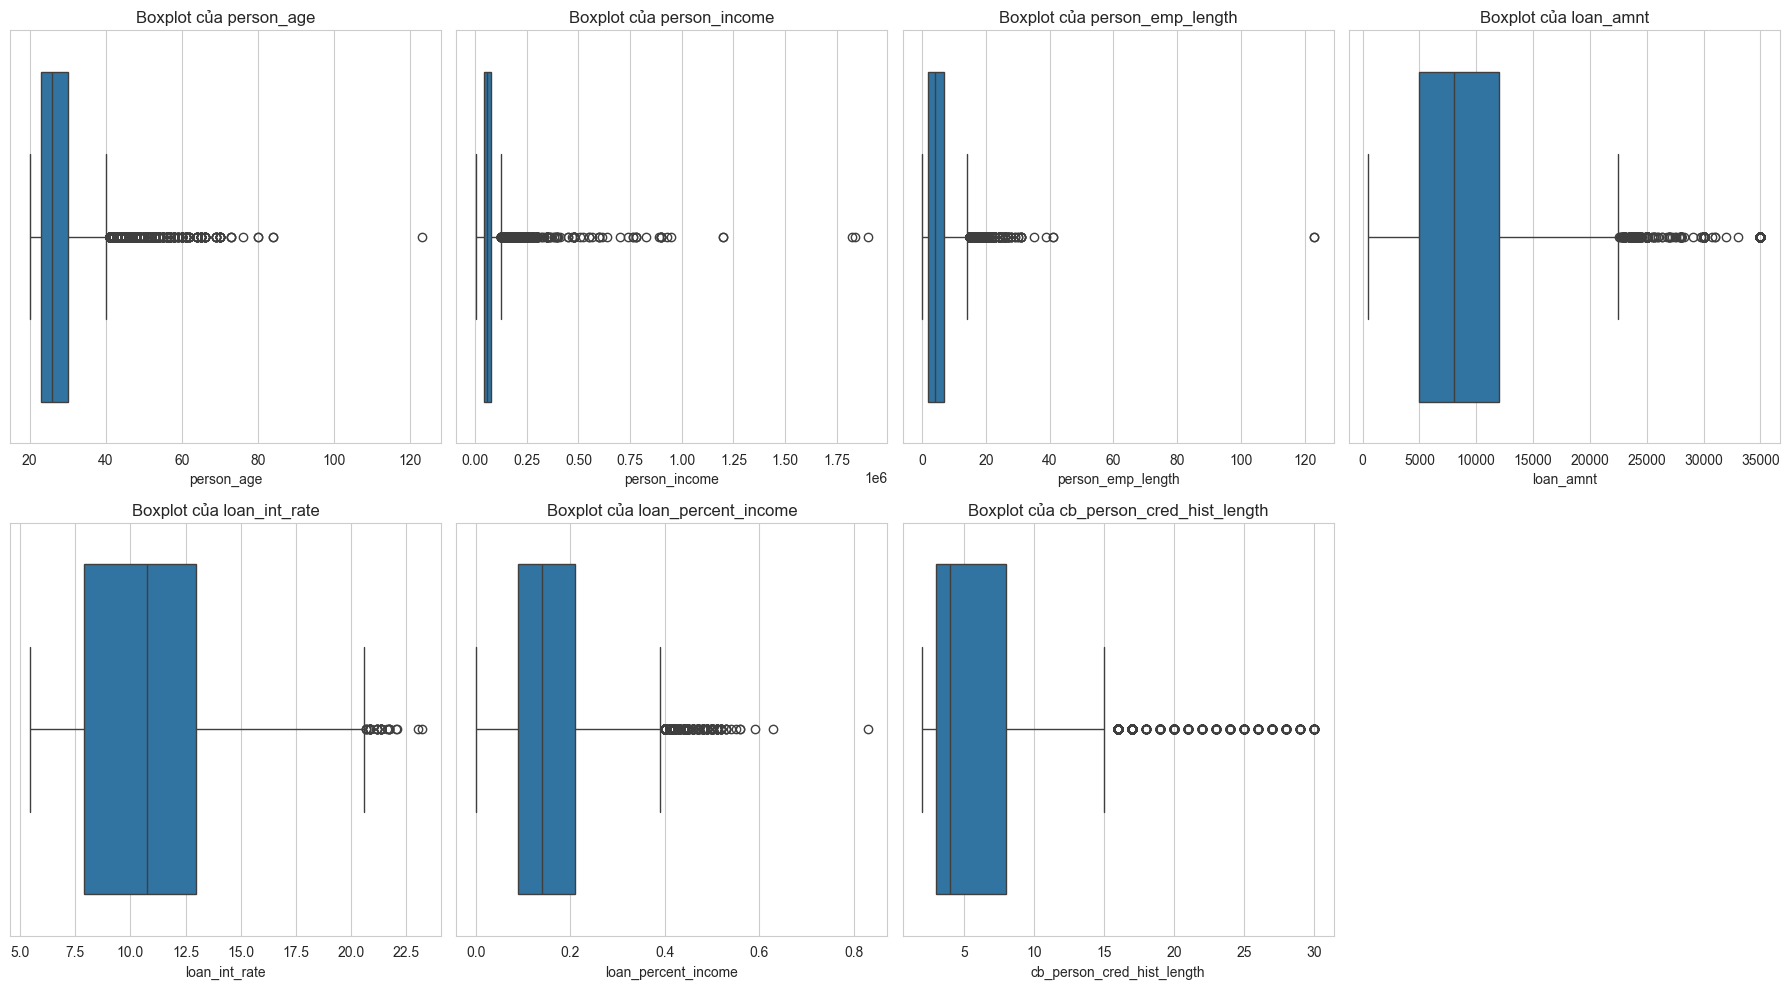

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_eda = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(18, 10))
for i, col in enumerate(cols_to_eda):
    plt.subplot(2, 4, i + 1) 
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()

**Nhận xét:**
- **person_age (Tuổi của người vay):**
    - Các box tập trung chủ yếu ở độ tuổi khoảng 20 đến 35.
    - Đường trung vị (median) nằm trong khoảng 25-30 tuổi.
    - Có rất nhiều outliers lai ở phía trên, đặc biệt là các giá trị trên 60 tuổi, và một vài giá trị rất cao như chúng ta đã thấy (123).
- **person_income (Thu nhập hàng năm của người vay):**
    - Các box tập trung ở mức thu nhập tương đối thấp, có vẻ như phần lớn dữ liệu nằm dưới khoảng 100,000.
    - Đường trung vị có vẻ thấp hơn giá trị trung bình mà chúng ta thấy trước đó, cho thấy phân phối lệch phải.
    - Có rất nhiều outliers ở phía trên, cho thấy một số người có thu nhập rất cao.
- **person_emp_length (Số năm kinh nghiệm làm việc):**
    - Hộp tập trung ở thời gian làm việc ngắn, dưới khoảng 10 năm. 
    - Chúng ta thấy rõ giá trị outlier 123. 
    - Ngoài ra, cũng có một số ít đáng ngờ ở phía trên (trên 40-50 năm).
- **loan_amnt (Số tiền vay):**
    - Các box tập trung ở các khoản vay dưới 15,000.
    - Đường trung vị khoảng 8,000.
    - Có một số outliers ở phía trên, cho thấy có những khoản vay rất lớn.
- **loan_int_rate (Lãi suất khoản vay):**
    - Các box tập trung ở mức lãi suất khoảng 8% đến 13%.
    - Đường trung vị khoảng 10-11%.
    - Có một vài giá trị ngoại lai ở cả phía trên và phía dưới, cho thấy có những khoản vay với lãi suất rất thấp hoặc rất cao.
- **loan_percent_income (Tỷ lệ phần trăm thu nhập hàng năm dùng để trả nợ):**
    - Các box tập trung ở tỷ lệ dưới 0.2.
    - Đường trung vị khoảng 0.15.
    - Có rất nhiều giá trị ngoại lai ở phía trên, tiềm ẩn rủi ro.
- **cb_person_cred_hist_length (Số năm lịch sử tín dụng):**
    - Các box tập trung ở khoảng 2 đến 8 năm.
    - Đường trung vị khoảng 4-5 năm.
    - Có một số giá trị ngoại lai ở phía trên, cho thấy có những người có lịch sử tín dụng rất dài.

**Kết luận từ các boxplot:**
Các boxplot này đã xác nhận trực quan sự tồn tại của các giá trị ngoại lai mà chúng ta đã nghi ngờ từ trước, đặc biệt là ở các cột person_age, person_income, loan_percent_income. Chúng cũng cho thấy hình dạng phân phối của từng biến số.

### Xử lý outliers ở cột person_emp_length

Kích thước DataFrame trước khi loại bỏ outlier: (58645, 13)
Kích thước DataFrame sau khi loại bỏ outlier: (58643, 13)


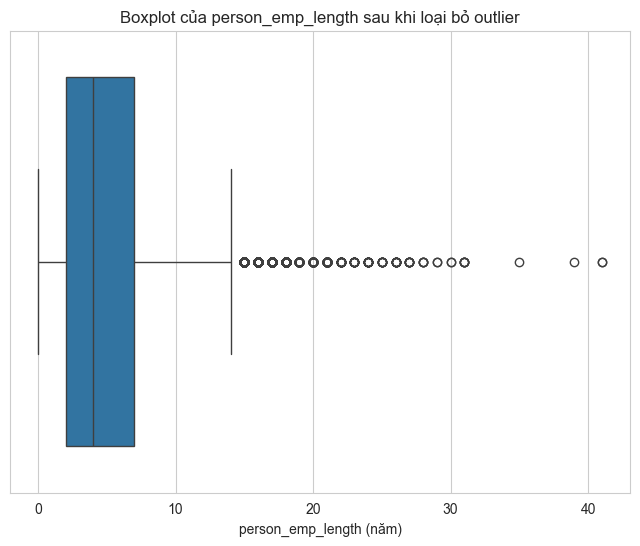

In [25]:
# In kích thước DataFrame trước khi loại bỏ
print(f"Kích thước DataFrame trước khi loại bỏ outlier: {df_train.shape}")

# Loại bỏ bản ghi có person_emp_length bằng 123
df_train = df_train[df_train['person_emp_length'] != 123]

# In kích thước DataFrame sau khi loại bỏ
print(f"Kích thước DataFrame sau khi loại bỏ outlier: {df_train.shape}")

# Vẽ lại boxplot để kiểm tra (tùy chọn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['person_emp_length'])
plt.title('Boxplot của person_emp_length sau khi loại bỏ outlier')
plt.xlabel('person_emp_length (năm)')
plt.show()


**Lý do loại bỏ outliers 123:**
- **Tính bất thường và phi thực tế:** Giá trị 123 năm kinh nghiệm làm việc là cực kỳ bất thường và không thực tế trong bối cảnh thông thường. Tuổi thọ trung bình của con người hiện nay hiếm khi vượt quá con số này, huống chi là số năm làm việc liên tục.
- **Khả năng cao là lỗi dữ liệu:** Một giá trị cao bất thường như vậy thường là dấu hiệu của lỗi nhập liệu, sai sót trong quá trình thu thập dữ liệu, hoặc một giá trị placeholder không được xử lý đúng cách.
- **Ảnh hưởng tiêu cực đến mô hình:** Một giá trị ngoại lai quá lớn có thể gây ra những ảnh hưởng tiêu cực đến quá trình huấn luyện của mô hình học máy:
  - **Sai lệch trong quá trình scaling:** Nếu chúng ta thực hiện scaling trên cột này mà không loại bỏ giá trị 123, nó sẽ kéo giãn phạm vi scale và có thể làm cho các giá trị thực tế khác bị "nén" lại trong một khoảng nhỏ, gây khó khăn cho mô hình trong việc học các mẫu dữ liệu.
  - **Ảnh hưởng đến các mô hình nhạy cảm với khoảng cách:** Các mô hình như k-Nearest Neighbors (k-NN) hoặc các mô hình dựa trên khoảng cách khác có thể bị ảnh hưởng lớn bởi một điểm dữ liệu nằm quá xa so với các điểm còn lại.
  - **Gây nhiễu cho quá trình học:** Một giá trị không thực tế có thể khiến mô hình học các quy luật sai lệch hoặc kém tổng quát hóa.
- **Không mang lại thông tin hữu ích:** Một người làm việc liên tục 123 năm là một trường hợp cực kỳ hiếm và có thể không đại diện cho bất kỳ phân khúc khách hàng thực tế nào mà mô hình cần dự đoán. Do đó, việc giữ lại giá trị này có thể không đóng góp vào việc xây dựng một mô hình tốt.


### Xử lý các outliers ở cột person_age

- Thay vì áp dụng các phương pháp thống kê thuần túy để xác định và loại bỏ outliers dựa trên khoảng tứ phân vị (IQR) hoặc độ lệch chuẩn, chúng tôi đã kết hợp xem xét các yếu tố sau:
    - **Ngưỡng pháp lý:** Theo quy định pháp luật về khả năng vay vốn, độ tuổi tối thiểu thường là 18 tuổi. Do đó, các trường hợp có person_age dưới 18 được coi là không hợp lệ và đã được loại bỏ khỏi tập dữ liệu.
    - **Phân phối dữ liệu và tính hợp lệ:** Quan sát từ biểu đồ boxplot cho thấy phần lớn dữ liệu tập trung trong khoảng 20 - 60 tuổi. Mặc dù có các giá trị nằm ngoài phạm vi này, chúng tôi nhận thấy các giá trị trong khoảng 65 - 80 tuổi vẫn có thể đại diện cho các cá nhân hợp lệ có nhu cầu vay vốn. Việc loại bỏ các trường hợp này có thể dẫn đến mất mát thông tin hữu ích cho mô hình.

- Dựa trên những phân tích trên, chúng tôi đã thực hiện các bước sau:
    - **Loại bỏ các bản ghi có person_age nhỏ hơn 18.** Điều này nhằm đảm bảo tính tuân thủ pháp lý của dữ liệu và loại bỏ các trường hợp không đủ điều kiện vay vốn.
    - **Giữ nguyên các bản ghi có person_age trong khoảng từ 18 đến 80.** Chúng tôi cho rằng các giá trị này vẫn nằm trong phạm vi có thể chấp nhận được của độ tuổi người vay và có thể chứa thông tin quan trọng cho việc huấn luyện mô hình.


In [26]:
df_age_valid = df_train[(df_train['person_age'] >= 18) & (df_train['person_age'] <= 80)]
print(df_age_valid.shape)
print(df_train.shape)
df_train = df_age_valid

(58640, 13)
(58643, 13)


**Kết quả:**
- Sau khi áp dụng phương pháp này, kích thước của tập dữ liệu đã thay đổi từ (58643, 13) thành (58640, 13), cho thấy chúng tôi đã loại bỏ 3 bản ghi có độ tuổi nằm ngoài phạm vi [18, 80].
- Phương pháp xử lý outlier này được lựa chọn nhằm loại bỏ các giá trị bất thường có khả năng gây nhiễu và tập trung vào phạm vi độ tuổi phù hợp cho bài toán dự đoán phê duyệt khoản vay. Chúng tôi sẽ tiếp tục theo dõi hiệu suất của mô hình sau các bước tiền xử lý khác để đánh giá hiệu quả của phương pháp này.

### Xử lý ở hai cột person_income và loan_amnt

- Đề xuất phương pháp: **Giữ nguyên** các giá trị hiện tại
- Lý do: tính thực tế (có thể chứa các thông tin quan trọng)
    - Đối với person_income:  Thu nhập cao là một yếu tố quan trọng và không nhất thiết là bất thường. Mô hình có thể học được mối quan hệ giữa thu nhập cao và khả năng trả nợ.
    - Đối với loan_amnt: Số tiền vay lớn là một phần tự nhiên của nghiệp vụ cho vay, đặc biệt đối với những người có thu nhập cao.

### Xử lý ở cột loan_int_rate 

*Dải giá trị tập trung từ 6% - 15% và có nhiều outlier vượt 20% trở lên cao bất thường so với phần lớn mẫu. Lãi suất quá cao thường chỉ ra khách hàng có rủi ro cao hoặc lỗi nhập liệu. Vì vậy sử dụng phương pháp điền khuyết bằng median.*

In [27]:
median_rate = df_train.loc[(df_train['loan_int_rate'] >= 5) & (df_train['loan_int_rate'] <= 20), 'loan_int_rate'].median()

df_train['loan_int_rate'] = np.where(df_train['loan_int_rate'] > 30, median_rate, df_train['loan_int_rate'])

**Lý do lựa chọn phương pháp điền khuyết bằng giá trị trung vị (median) cho các giá trị ngoại lai cao:**
- Tính Robust: Giá trị trung vị ít bị ảnh hưởng bởi các giá trị cực đoan so với giá trị trung bình.
- Bảo toàn phân phối chung: Việc điền khuyết bằng median của các giá trị "bình thường" giúp duy trì hình dạng chung của phân phối lãi suất.

**Lưu ý:** Ngưỡng dưới: cần xem xét đến các giá trị lãi suất quá thấp (dưới 5%) là outliers không? Trong nghiệp vụ cho vay, lãi suất thường có một mức sàn nhất định. Tuy nhiên, với dữ liệu này, có vẻ như các giá trị thấp không quá nhiều và có thể là các chương trình ưu đãi đặc biệt. Quyết định không xử lý chúng ở bước này có thể chấp nhận được.

### Xử lý ở cột loan_percent_income

*Phần lớn các giá trị dưới 0.4 nhưng có outlier 0.6 - 0.8. Theo Federal Reserve, tỷ lệ trả nợ/tổng thu nhập khả dụng (debt service ratio) của hộ gia đình Mỹ vào năm 2023 là khoảng 9.8% – tức khoảng gần 10% thu nhập được dùng để trả nợ hằng kỳ.*

**Lấy ví dụ: một cá nhân có tổng thu nhập hàng năm là 45,000 USD và chi phí nhà ở hàng tháng là 1,050 USD sẽ có tỷ lệ chi tiêu trước mắt là 28% (1,050 USD/3,750 USD). Nếu tổng số tiền thanh toán nợ hàng tháng của họ, bao gồm cả tiền nhà, lên tới 1,350 USD, thì tỷ lệ hoàn vốn của họ sẽ là 36% (1,350 USD/3,750 USD). Vì vậy để đạt tỉ lệ lên tới 0.6 - 0.8 là rất hiếm và gần như chạm ngưỡng không thể trả nợ. Con số này tại Hoa Kì trong một số bài báo chỉ có thể đạt tới 45%*

In [28]:
df_filtered = df_train[df_train['loan_percent_income'] <= 0.5]
print(df_filtered.shape)
print(df_train.shape)
df_train = df_filtered

(58601, 13)
(58640, 13)


**Kết quả:**
- Kích thước của df_train trước khi lọc là (58640, 13).
- Kích thước của df_train sau khi lọc là (58601, 13).
- Vậy, số lượng bản ghi đã bị loại bỏ là 58640 - 58001 = 39.

**Nhận xét về việc xử lý outliers ở loan_percent_income:**
- Mức độ loại bỏ chấp nhận được: Việc loại bỏ 39 bản ghi trên tổng số hơn 58,000 (chưa đến 1%) có thể coi là một mức độ mất mát dữ liệu nhỏ và chấp nhận được, đặc biệt khi chúng ta có lý do chính đáng để tin rằng các giá trị bị loại bỏ là bất thường và có thể gây nhiễu cho mô hình.
- Căn cứ vững chắc: đã cung cấp các số liệu và giải thích hợp lý về ngưỡng 0.5 dựa trên tình hình thực tế về khả năng trả nợ.

### Xử lý trên cột cb_person_cred_hist_length

*Thời gian có lịch sử tín dụng thường từ vài năm đến 10–15 năm. Trong ngành ngân hàng, thông tin lịch sử tín dụng có giá trị rất lớn. Nếu phát hiện giá trị không hợp lý (quá cao), thường cần kiểm tra lại với bộ phận dữ liệu thay vì loại bỏ hoàn toàn. Việc điền khuyết bằng median giúp giảm nhiễu mà không mất thông tin quan trọng.*

In [29]:
valid_mask = (df_train['cb_person_cred_hist_length'] >= 0) & (df_train['cb_person_cred_hist_length'] <= 30)
median_cred_hist = df_train.loc[valid_mask, 'cb_person_cred_hist_length'].median()

df_train['cb_person_cred_hist_length'] = np.where(~valid_mask,
                                                  median_cred_hist,
                                                  df_train['cb_person_cred_hist_length'])

C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_22132\874853456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cb_person_cred_hist_length'] = np.where(~valid_mask,


**Nhận xét:** Phương pháp điền khuyết bằng giá trị trung vị (median) cho các giá trị không hợp lý (ngoài phạm vi 0-30 năm) là một lựa chọn ổn vì:
- **Bảo toàn thông tin:** Thay vì loại bỏ hoàn toàn, chúng ta giữ lại bản ghi và chỉ điều chỉnh giá trị của cột có vấn đề.
- **Giảm nhiễu:** Việc điền khuyết bằng median giúp giảm tác động của các giá trị ngoại lai mà không làm thay đổi đáng kể phân phối chung của cột.
- **Phù hợp với nghiệp vụ:** Nhận xét về việc ngân hàng thường không loại bỏ hoàn toàn outliers trong các cột quan trọng như lịch sử tín dụng là rất chính xác.

## 4.3 Mã hoá dữ liệu - Encoding

In [30]:
# Ta sẽ loại bỏ cột id vì cột này mang tính chất đánh số thứ tự dữ liệu không ảnh hưởng đến quyết định cho vay
df_train.drop(['id'], axis=1, inplace=True)

C:\Users\NguyenCongPhat\AppData\Local\Temp\ipykernel_22132\1451170834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id'], axis=1, inplace=True)


**Dựa trên EDA, các cột categorical cần được mã hoá dữ liệu (encoding) là:**
- person_home_ownership: ['RENT', 'OWN', 'MORTGAGE', 'OTHER'] (Nominal)
- loan_intent: ['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'] (Nominal)
- loan_grade: ['B', 'C', 'A', 'D', 'E', 'F', 'G'] (Ordinal)
- cb_person_default_on_file: ['N', 'Y'] (Binary)

**Thống nhất các phương pháp encoding như sau:**
- One-Hot Encoding cho các biến nominal (person_home_ownership, loan_intent).
- Label Encoding cho các biến ordinal và binary (loan_grade, cb_person_default_on_file).

In [31]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [32]:
# 1. One-Hot Encoding cho 'person_home_ownership'
df_train = pd.get_dummies(df_train, columns=['person_home_ownership'], prefix='home_ownership', drop_first=True)

# 2. One-Hot Encoding cho 'loan_intent'
df_train = pd.get_dummies(df_train, columns=['loan_intent'], prefix='loan_intent', drop_first=True)

# 3. Label Encoding cho 'loan_grade'
label_encoder_grade = LabelEncoder()
df_train['loan_grade_encoded'] = label_encoder_grade.fit_transform(df_train['loan_grade'])
# Map các giá trị để đảm bảo thứ tự A < B < C < ... < G
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df_train['loan_grade_encoded'] = df_train['loan_grade'].map(grade_mapping)
df_train.drop('loan_grade', axis=1, inplace=True)

# 4. Label Encoding cho 'cb_person_default_on_file'
label_encoder_default = LabelEncoder()
df_train['cb_person_default_on_file_encoded'] = label_encoder_default.fit_transform(df_train['cb_person_default_on_file'])
# Map 'N' thành 0 và 'Y' thành 1
default_mapping = {'N': 0, 'Y': 1}
df_train['cb_person_default_on_file_encoded'] = df_train['cb_person_default_on_file'].map(default_mapping)
df_train.drop('cb_person_default_on_file', axis=1, inplace=True)

**Nhận xét phương pháp:**
- **One-Hot Encoding:** Chúng ta sử dụng pd.get_dummies() để tạo các cột nhị phân mới cho mỗi giá trị duy nhất trong các cột person_home_ownership và loan_intent. prefix được sử dụng để đặt tiền tố cho tên cột mới, giúp dễ dàng nhận biết. drop_first=True được sử dụng để tránh multicollinearity (tương quan đa cộng tuyến) bằng cách loại bỏ cột đầu tiên trong mỗi nhóm các cột được tạo.
- **Label Encoding:** Chúng ta sử dụng LabelEncoder từ sklearn.preprocessing để chuyển đổi các giá trị trong cột loan_grade và cb_person_default_on_file thành các số. Chúng ta cũng tạo một mapping rõ ràng để đảm bảo thứ tự mã hóa cho loan_grade là đúng (A < B < ... < G) và cho cb_person_default_on_file là 'N' -> 0 và 'Y' -> 1. Sau khi mã hóa, chúng ta loại bỏ các cột ban đầu.

In [33]:
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 58601 entries, 0 to 58644
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         58601 non-null  int64  
 1   person_income                      58601 non-null  int64  
 2   person_emp_length                  58601 non-null  int64  
 3   loan_amnt                          58601 non-null  int64  
 4   loan_int_rate                      58601 non-null  float64
 5   loan_percent_income                58601 non-null  float64
 6   cb_person_cred_hist_length         58601 non-null  float64
 7   loan_status                        58601 non-null  int64  
 8   home_ownership_OTHER               58601 non-null  bool   
 9   home_ownership_OWN                 58601 non-null  bool   
 10  home_ownership_RENT                58601 non-null  bool   
 11  loan_intent_EDUCATION              58601 non-null  bool   


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded,cb_person_default_on_file_encoded
0,37,35000,0,6000,11.49,0.17,14.0,0,False,False,True,True,False,False,False,False,1,0
1,22,56000,6,4000,13.35,0.07,2.0,0,False,True,False,False,False,True,False,False,2,0
2,29,28800,8,6000,8.90,0.21,10.0,0,False,True,False,False,False,False,True,False,0,0
3,30,70000,14,12000,11.11,0.17,5.0,0,False,False,True,False,False,False,False,True,1,0
4,22,60000,2,6000,6.92,0.10,3.0,0,False,False,True,False,False,True,False,False,0,0
5,27,45000,2,9000,8.94,0.20,5.0,0,False,False,True,False,False,False,False,True,0,0
6,25,45000,9,12000,6.54,0.27,3.0,0,False,False,False,True,False,False,False,False,0,0
7,21,20000,0,2500,13.49,0.13,3.0,0,False,False,True,False,False,False,True,False,2,1
8,37,69600,11,5000,14.84,0.07,11.0,0,False,False,True,True,False,False,False,False,3,1
9,35,110000,0,15000,12.98,0.14,6.0,0,False,False,False,False,False,False,False,False,2,1


Khi này, DataFrame df_train sẽ chứa các biến categorical đã được mã hóa thành dạng số, sẵn sàng cho bước chuẩn hóa dữ liệu hoặc trực tiếp đưa vào mô hình.

## 4.4 Chuẩn hoá dữ liệu - Data Scaling

### Xem lại dữ liệu trước khi chọn phương pháp chuẩn hoá

- *Chuẩn hóa dữ liệu là một giai đoạn tiền xử lý quan trọng, áp dụng các kỹ thuật nhằm biến đổi giá trị của các cột số trong tập dữ liệu df_train về một thang đo chung. Mục tiêu của quá trình này là bảo toàn sự khác biệt tương đối giữa các phạm vi giá trị, đồng thời tối ưu hóa hiệu suất của mô hình học máy bằng cách cải thiện tốc độ hội tụ và tiềm năng nâng cao độ chính xác.*
- *Tuy nhiên, việc áp dụng chuẩn hóa dữ liệu cần được xem xét dựa trên đặc điểm phân phối của từng thuộc tính và yêu cầu của thuật toán học máy được lựa chọn. Không phải mọi tập dữ liệu đều hưởng lợi từ quá trình chuẩn hóa, và việc áp dụng không cần thiết có thể không mang lại cải thiện đáng kể.*

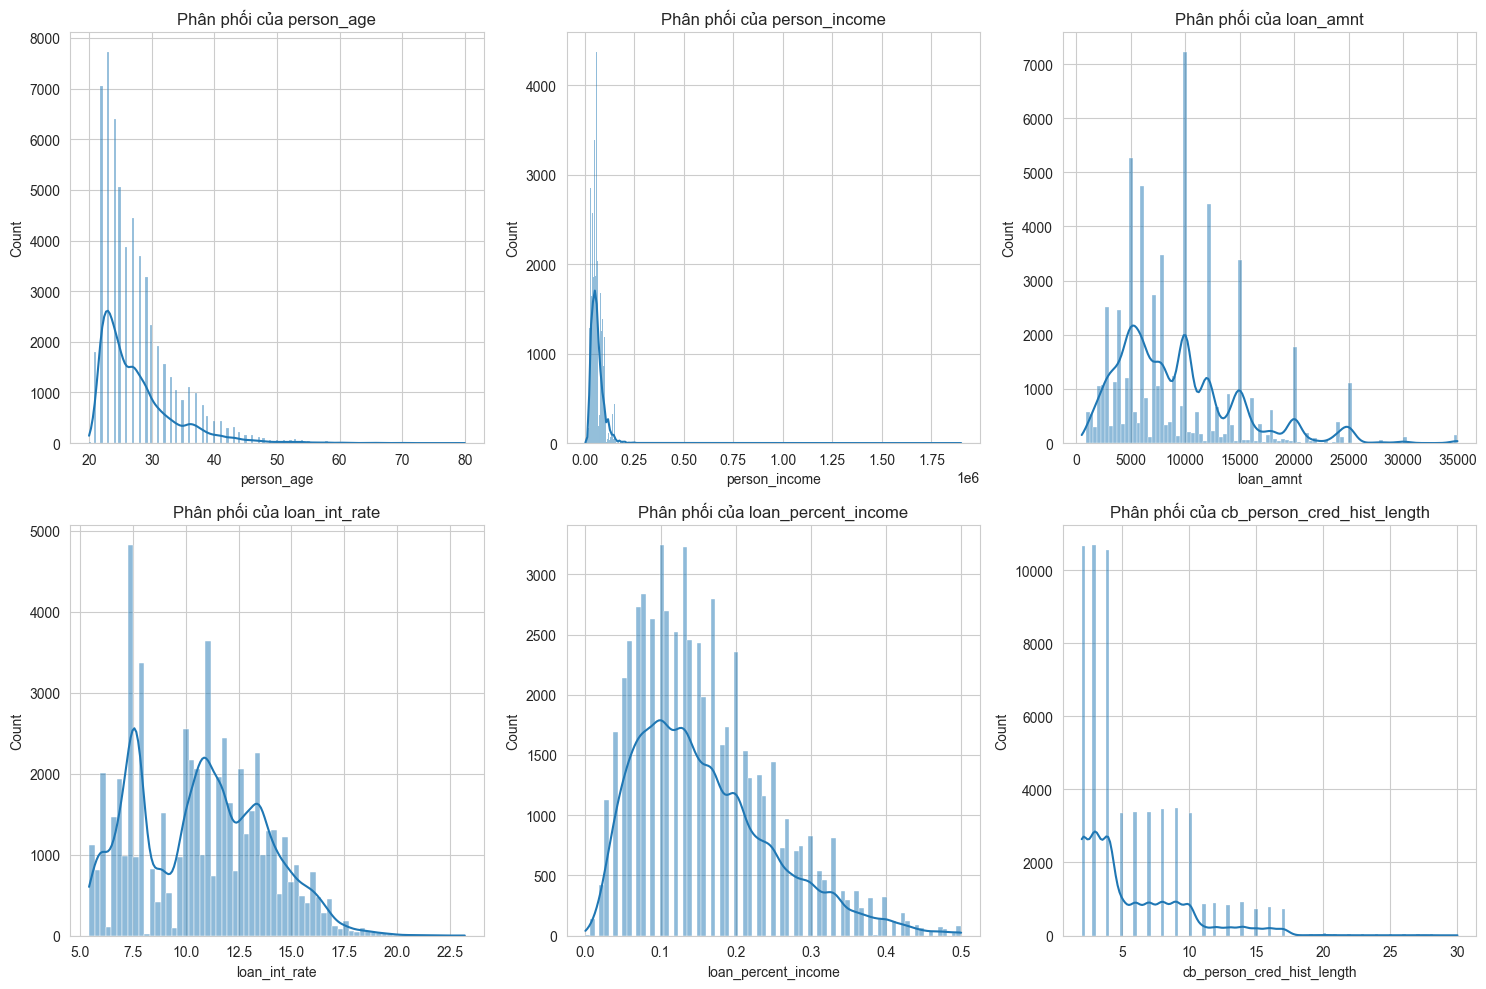

In [34]:
# Vẽ các biểu đồ histogram (kèm KDE) cho các cột person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, và cb_person_cred_hist_length
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

In [35]:
max_values = df_train.max(numeric_only=True)
print(max_values.to_frame(name='Max Value'))

                                  Max Value
person_age                               80
person_income                       1900000
person_emp_length                        41
loan_amnt                             35000
loan_int_rate                         23.22
loan_percent_income                     0.5
cb_person_cred_hist_length             30.0
loan_status                               1
home_ownership_OTHER                   True
home_ownership_OWN                     True
home_ownership_RENT                    True
loan_intent_EDUCATION                  True
loan_intent_HOMEIMPROVEMENT            True
loan_intent_MEDICAL                    True
loan_intent_PERSONAL                   True
loan_intent_VENTURE                    True
loan_grade_encoded                        6
cb_person_default_on_file_encoded         1


**Đánh giá độ lệch của dữ liệu từ biểu đồ:**
- **person_age:** Phân phối có vẻ hơi lệch phải, với phần lớn dữ liệu tập trung ở độ tuổi trẻ (20-40) và đuôi kéo dài về phía độ tuổi cao hơn (đến 80). Đường KDE cho thấy một đỉnh chính và một đuôi mỏng hơn.
- **person_income:** Phân phối rõ ràng là lệch phải nghiêm trọng. Phần lớn dữ liệu tập trung ở mức thu nhập thấp, và có một đuôi rất dài kéo về phía thu nhập cao. Đường KDE cho thấy một đỉnh rất cao ở gần 0 và giảm dần rất chậm về phía bên phải.
- **loan_amnt:** Phân phối có vẻ phức tạp hơn, có thể có nhiều đỉnh nhỏ, nhưng nhìn chung có xu hướng lệch phải. Phần lớn các khoản vay có giá trị thấp hơn, và có một đuôi kéo dài về phía các khoản vay lớn hơn.
- **loan_int_rate:** Phân phối có vẻ gần với phân phối chuẩn hơn so với thu nhập, nhưng vẫn có thể có một chút lệch phải. Có một đỉnh rõ ràng trong khoảng 5-15% và giảm dần sau đó.
- **loan_percent_income:** Phân phối lệch phải rõ rệt, với phần lớn dữ liệu tập trung ở tỷ lệ thấp (dưới 0.2) và một đuôi kéo dài đến 0.5 (sau khi đã xử lý outliers).
- **cb_person_cred_hist_length:** Phân phối lệch phải nghiêm trọng. Phần lớn dữ liệu tập trung ở thời gian ngắn (dưới 10 năm) và đuôi kéo dài đến 30 năm.

### Tại sao biểu đồ phân phối lại quan trọng trong việc chọn scaler?

- **MinMaxScaler (Normalization):** Thường được ưu tiên khi dữ liệu có một phạm vi hữu hạn và không có quá nhiều outliers. Nó co giãn dữ liệu về một phạm vi cố định (thường [0, 1]). Nếu phân phối không phải là Gaussian, MinMaxScaler có thể giữ nguyên hình dạng phân phối ban đầu tốt hơn StandardScaler.

- **StandardScaler (Z-score scaling):** Chuẩn hóa dữ liệu để có mean là 0 và standard deviation là 1. Nó hữu ích khi dữ liệu có phân phối gần Gaussian hoặc khi các thuật toán (ví dụ: SVM, linear regression) giả định dữ liệu có phân phối chuẩn. Nó ít bị ảnh hưởng bởi outliers hơn MinMaxScaler.

- **Phân phối lệch:** Nếu một cột có phân phối lệch (ví dụ: person_income mà chúng ta thấy có nhiều giá trị nhỏ và một vài giá trị rất lớn), việc sử dụng StandardScaler có thể nén phần lớn dữ liệu vào một khoảng nhỏ xung quanh mean, trong khi các outliers vẫn ở xa. Trong trường hợp này, MinMaxScaler có thể giữ được sự khác biệt tương đối giữa các điểm dữ liệu tốt hơn trong phạm vi [0, 1].

### Lựa chọn phương pháp: MinMaxScaler

**Giải thích tại sao chọn MinMaxScaler thay vì StandardScaler:**
- **Bảo toàn hình dạng phân phối:** MinMaxScaler co giãn dữ liệu về một phạm vi cố định (thường là [0, 1]) mà không làm thay đổi hình dạng phân phối ban đầu. Trong khi đó, StandardScaler cố gắng đưa dữ liệu về phân phối chuẩn (mean = 0, standard deviation = 1), điều này có thể làm thay đổi hình dạng của các phân phối lệch.
- **Ảnh hưởng của outliers:** Mặc dù chúng ta đã xử lý một số outliers, nhưng các phân phối lệch vẫn có thể chứa các giá trị ở đuôi có khoảng cách lớn so với phần lớn dữ liệu. StandardScaler nhạy cảm với outliers ở chỗ chúng có thể ảnh hưởng đến mean và standard deviation, dẫn đến việc phần lớn dữ liệu bị nén vào một khoảng nhỏ. MinMaxScaler ít bị ảnh hưởng hơn bởi các outliers sau khi chúng đã được giới hạn trong một phạm vi nhất định.
- **Phạm vi giá trị cố định:** MinMaxScaler đảm bảo rằng tất cả các đặc trưng sẽ có giá trị trong khoảng [0, 1]. Điều này có thể hữu ích cho một số thuật toán nhất định (ví dụ: neural networks) hoặc khi muốn so sánh trực tiếp tầm quan trọng tương đối của các đặc trưng.

**Tóm lại,** do sự hiện diện của các phân phối lệch đáng kể trong các cột số quan trọng như person_income, loan_amnt, loan_percent_income và cb_person_cred_hist_length, việc sử dụng MinMaxScaler có thể giúp bảo toàn tốt hơn sự khác biệt tỷ lệ giữa các giá trị trong một phạm vi cố định, đồng thời giảm thiểu tác động tiềm ẩn của các giá trị ngoại lai còn sót lại lên quá trình scaling, so với việc sử dụng StandardScaler có xu hướng thay đổi hình dạng phân phối và nhạy cảm hơn với outliers

*Các cột được chọn để scale là các cột số chính, loại trừ các cột đã được mã hóa nhị phân (ví dụ: kết quả của one-hot encoding và label encoding cho biến nhị phân).:*
- *person_age: Tuổi người vay - giá trị số có scale nhỏ hơn income/loan*
- *person_income: Thu nhập - giá trị rất lớn*
- *loan_amnt: Số tiền vay - giá trị đa dạng vì không có mức giới hạn cụ thể độ lớn*
- *loan_int_rate: Lãi suất khoản vay - là phần trăm và có thể lệch với loan_percent_income*
- *loan_percent_income: Tỉ lệ tiền vay/thu nhập là phần trăm có thể lệch loan_int_rate*
- *cb_person_cred_hist_length: Thời gian có lịch sử tín dụng - tương tự với tuổi người vay*

In [36]:
cols_to_scale = ['person_age', 'person_income', 'loan_amnt',
                 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = MinMaxScaler()
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [37]:
df_train.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded,cb_person_default_on_file_encoded
0,0.283333,0.016246,0,0.159420,0.341011,0.34,0.428571,0,False,False,True,True,False,False,False,False,1,0
1,0.033333,0.027324,6,0.101449,0.445506,0.14,0.000000,0,False,True,False,False,False,True,False,False,2,0
2,0.150000,0.012976,8,0.159420,0.195506,0.42,0.285714,0,False,True,False,False,False,False,True,False,0,0
3,0.166667,0.034708,14,0.333333,0.319663,0.34,0.107143,0,False,False,True,False,False,False,False,True,1,0
4,0.033333,0.029433,2,0.159420,0.084270,0.20,0.035714,0,False,False,True,False,False,True,False,False,0,0
5,0.116667,0.021521,2,0.246377,0.197753,0.40,0.107143,0,False,False,True,False,False,False,False,True,0,0
6,0.083333,0.021521,9,0.333333,0.062921,0.54,0.035714,0,False,False,False,True,False,False,False,False,0,0
7,0.016667,0.008334,0,0.057971,0.453371,0.26,0.035714,0,False,False,True,False,False,False,True,False,2,1
8,0.283333,0.034497,11,0.130435,0.529213,0.14,0.321429,0,False,False,True,True,False,False,False,False,3,1
9,0.250000,0.055808,0,0.420290,0.424719,0.28,0.142857,0,False,False,False,False,False,False,False,False,2,1


**Kết quả như mong đợi:** Các giá trị sau khi scale đã được đưa về phạm vi [0, 1].